# 📊 Limpieza de datos del Dataset  

---

**Objetivo del Notebook**  
Limpieza de datos, columnas innecesarias y valores nulos/blancos 

**Contexto del análisis**  
- Dataset de muestra proporcionado 
- Volumen reducido respecto al dataset real de producción  
- Enfoque en aprendizaje, validación del pipeline y comprensión del proceso

**Valor devuelto**  
- Copia del Dataset de muestra proporcionado completamente limpio y útil 

---




In [1]:
import pandas as pd
import xlsxwriter
import utils
# ===============================
# 0. LEER ARCHIVO Y HOJAS
# ===============================
xls = pd.ExcelFile(r"..\datos\DataSET_SF.xlsx")
nombres_hojas = xls.sheet_names

# =================================
# 1. ELIMINAR COLUMNAS INNECESARIAS
# =================================
columnas_a_eliminar = [
    "Columna1", "Columna2", "..."
]

# ===============================
# 2. LIMPIEZA DE DATOS
# ===============================
hojas_limpias = {}
for nombre_hoja in nombres_hojas:
    df = pd.read_excel(xls, sheet_name=nombre_hoja)

    df.drop(columns=[c for c in columnas_a_eliminar if c in df.columns]) # eliminar columnas innecesarias
    df.dropna(how='all') # eliminar filas completamente vacías
    #df.drop_duplicates(inplace=True) # eliminar duplicados exactos
    
    #df_limpio = df.dropna(how='any')  # eliminar filas con NaN
    hojas_limpias[nombre_hoja] = df

# ===============================
# 3. GUARDAR EXCEL LIMPIO
# ===============================
with pd.ExcelWriter(r"..\datos\DataSet Probabilidad Matrículas_Juan.xlsx", engine='xlsxwriter') as writer:
    for nombre_hoja in nombres_hojas:
        hojas_limpias[nombre_hoja].to_excel(writer, sheet_name=nombre_hoja, index=False)

print("Archivo limpio guardado como 'DataSet Probabilidad Matrículas_Juan.xlsx'")




FileNotFoundError: [Errno 2] No such file or directory: '..\\datos\\DataSET_SF.xlsx'

In [ ]:
import pandas as pd
import xlsxwriter
import utils
# ===============================
# 4. LEER EL ARCHIVO LIMPIO
# ===============================
dfs = pd.read_excel(r"..\datos\DataSet Probabilidad Matrículas_Juan.xlsx", sheet_name=None)

# Ver la primera hoja
oportunidad = list(dfs.values())[0]
cuenta = list(dfs.values())[1]
ecb = list(dfs.values())[2]
solicitud_ban = list(dfs.values())[3]
casos = list(dfs.values())[4]
correos = list(dfs.values())[5]
historial_actividad = list(dfs.values())[6]
historial_etapas = list(dfs.values())[7]


print(historial_etapas.head())

    LK_Oportunidad__c       PL_Etapa__c PL_Subetapa__c  \
0  0061r00000yz6vuAAA  Propuesta centro       Validada   
1  0061r00000yz6vuAAA        Resolución      Publicada   
2  0061r00000yz6vuAAA  Propuesta centro       Validada   
3  0061r00000yz6vuAAA        Resolución      Publicada   
4  0061r00000yz6vuAAA  Propuesta centro       Validada   

                    CreatedDate  CH_Completa_principal__c  \
0  2022-08-02T13:02:10.000+0000                     False   
1  2022-08-02T13:02:10.000+0000                     False   
2  2022-08-02T13:02:36.000+0000                     False   
3  2022-08-03T06:58:58.000+0000                     False   
4  2022-08-03T06:59:30.000+0000                     False   

             Fecha_fin_etapa__c  
0  2022-08-02T13:02:10.000+0000  
1  2022-08-02T13:02:37.000+0000  
2  2022-08-03T06:58:58.000+0000  
3  2022-08-03T06:59:30.000+0000  
4  2022-08-03T07:18:19.000+0000  


In [ ]:
import pandas as pd

analisis_na_por_columna(oportunidad)


,columna,total_na,porcentaje_na
0,TX_MOTIVO_SOLICITUD,47386,100.0
1,MOTIVOMASTER,47386,100.0
2,OBSERVACIONESRESOLUCION,47386,100.0
3,PROBABILIDADMATRICULADELEGADO,47386,100.0
4,FECH_DEFINITIVA_VALORACI_N,47386,100.0
...,...,...,...
114,CH_INTERNACIONAL,0,0.0
115,CAMBIA_DE_CARRERA,0,0.0
116,CH_COMPLETA,0,0.0
117,CH_SIMULTANEIDAD,0,0.0


In [ ]:

eliminar_columnas_na(oportunidad).head()

,ID,ACCOUNTID,PL_CURSO_ACADEMICO,PL_TIPO_ACCESO,RECORDTYPEID,RECORDTYPENAME,PL_ESTADO,STAGENAME,PL_SUBETAPA,CH_SIMULTANEIDAD,...,CH_INFORMACION_ENVIADA,CH_CONDITIONED,CH_SOLICITA_ALOJAMIENTO,NOCONTABILIZABLE,PL_MODALIDAD_EXAMEN_ACCESO_ESC,KITDEVISADO,NU_PASOMAX,NU_PASO_SOLICITUD_ADMISION,CH_ACEPTO_CONDICIONES_MATRICUL,PL_DOMICILIO_DURANTE_CURSO
0,0061r00001KLSSJAA5,0011r00002YMDC6AAP,2022/2023,Acceso a primero,012w0000000K4QPAA0,Solicitud Admisión Grado,Validado,Reorientación,Respuesta candidato,false,...,1.0,0.0,0.0,0.0,Online,0.0,1.0,10.0,0.0,NaN
1,0066900001W1pVKAAZ,0016900002mntULAAY,2022/2023,Acceso a primero,012w0000000K4QPAA0,Solicitud Admisión Grado,Pendiente de validar,Cerrada/Perdida,NaN,false,...,0.0,0.0,0.0,0.0,Presencial,0.0,3.0,6.0,0.0,NaN
2,0066900001cHyR5AAK,0016900002vnx7kAAA,2022/2023,Acceso a primero,012w0000000K4QTAA0,Solicitud Matricula Grado,Pendiente de validar,Matrícula OOGG,Formalizada,false,...,0.0,0.0,0.0,0.0,Online,0.0,9.0,9.0,0.0,5.0
3,0066900001MevZwAAJ,0016900002aNZZuAAO,2022/2023,Acceso a primero,012w0000000K4QPAA0,Solicitud Admisión Grado,Validado,Pruebas de admisión,No presentado,false,...,1.0,0.0,0.0,0.0,Presencial,0.0,1.0,10.0,0.0,NaN
4,0066900001VzuaIAAR,0016900002jiFCfAAM,2022/2023,Acceso a primero,012w0000000K4QTAA0,Solicitud Matricula Grado,Pendiente de validar,Matrícula OOGG,Formalizada,false,...,0.0,0.0,0.0,0.0,Presencial,0.0,9.0,9.0,0.0,1.0


# Creación del TARGET
Para poder crear el target, se utilizarán dos tablas, la de oportunidad (oportunidad) y la del historial de etapas (historial_estapas). En la tabla de oportunidad viene el último estado de dicha oportunidad. En cambio, en la del historial de etapas, para cada oportunidad se tiene cada una de las etapas por las que ha pasado y el tiempo en el que empezó cada una de ellas.

Para construir el target, se sigue la siguiente lógica:

Para cada oportunidad, se revisa si el existe la etapa Matrícula OOGG y si está en el estado formalizada. También se comprueba que no se haya Desmatriculado. En el caso en el que para esa oportunidad haya un Matrícula OOGG, formalizada y no se haya matriculado, el target es 1. En caso contrario, es 0.

In [48]:


target = crear_target(oportunidad, historial_etapas)
target.head()

Hay un total de 15447 matrículas formalizadas. Un 25.79% del total de oportunidades
Hay un total de 1492 desmatriculados. Un 9.66% del total de matriculados


,ID,ACCOUNTID,PL_CURSO_ACADEMICO,PL_MES_ANIO_INICIO,PL_TIPO_ACCESO,RECORDTYPEID,RECORDTYPENAME,PL_ESTADO,STAGENAME,PL_SUBETAPA,...,DT_FECHA_FIN_MATRICULA_ADMISIO,DT_FECHA_INICIO_MATRICULA_OOGG,DT_FECHA_FIN_MATRICULA_OOGG,NU_PASOMAX,NU_PASO_SOLICITUD_ADMISION,CH_ACEPTO_CONDICIONES_MATRICUL,DT_FECHA_ACEPTA_COND_MATR,PL_DOMICILIO_DURANTE_CURSO,LK_COLEGIO_M_RESIDENCIA_DURANT,target
0,0061r00001KLSSJAA5,0011r00002YMDC6AAP,2022/2023,NaN,Acceso a primero,012w0000000K4QPAA0,Solicitud Admisión Grado,Validado,Reorientación,Respuesta candidato,...,NaT,NaT,NaT,1.0,10.0,0.0,NaT,NaN,NaN,0
1,0066900001W1pVKAAZ,0016900002mntULAAY,2022/2023,NaN,Acceso a primero,012w0000000K4QPAA0,Solicitud Admisión Grado,Pendiente de validar,Cerrada/Perdida,NaN,...,2021-11-30,2021-12-01,2021-12-02,3.0,6.0,0.0,NaT,NaN,NaN,0
2,0066900001cHyR5AAK,0016900002vnx7kAAA,2022/2023,NaN,Acceso a primero,012w0000000K4QTAA0,Solicitud Matricula Grado,Pendiente de validar,Matrícula OOGG,Formalizada,...,NaT,NaT,NaT,9.0,9.0,0.0,NaT,5.0,NaN,1
3,0066900001MevZwAAJ,0016900002aNZZuAAO,2022/2023,NaN,Acceso a primero,012w0000000K4QPAA0,Solicitud Admisión Grado,Validado,Pruebas de admisión,No presentado,...,NaT,NaT,NaT,1.0,10.0,0.0,NaT,NaN,NaN,0
4,0066900001VzuaIAAR,0016900002jiFCfAAM,2022/2023,NaN,Acceso a primero,012w0000000K4QTAA0,Solicitud Matricula Grado,Pendiente de validar,Matrícula OOGG,Formalizada,...,NaT,NaT,NaT,9.0,9.0,0.0,NaT,1.0,NaN,1


In [57]:
df_unido = pd.merge(
    target, 
    cuenta, 
    left_on='ACCOUNTID', 
    right_on='ID18', 
    how='left',
    suffixes=('', '_cuenta')
)		
df_unido_filter = eliminar_columnas_na(df_unido)
df_unido_filter.to_csv(r"..\datos\datos_oportunidad_cuenta_target.csv",sep=";")

In [50]:
import pandas as pd



# Ejemplo de uso:

historial_etapas=calcular_tiempos_etapas(historial_etapas)
# Unir tablas por id de oportunidad
df_unido = historial_etapas.merge(
    oportunidad[['ID', 'target']],
    left_on='LK_Oportunidad__c',
    right_on='ID',
    how='left'
)

# Calcular tiempo medio por etapa y target
df_unido_filter = df_unido.loc[df_unido['tiempo_etapa_dias']>0,]
resultado_global = df_unido_filter.groupby(['target'])['tiempo_etapa_dias'].mean().reset_index()
resultado_global.rename(columns={'tiempo_etapa_dias': 'tiempo_medio_dias'}, inplace=True)
resultado_etapa = df_unido_filter.groupby(['PL_Etapa__c','target'])['tiempo_etapa_dias'].mean().reset_index()
resultado_etapa.rename(columns={'tiempo_etapa_dias': 'tiempo_medio_dias'}, inplace=True)
    
print(resultado_etapa)
print(resultado_global)



                          PL_Etapa__c  target  tiempo_medio_dias
0                     Cerrada/Perdida     0.0          31.835536
1                     Cerrada/Perdida     1.0          21.854054
2                              Citado     0.0           8.000000
3                              Citado     1.0           6.000000
4   Comisión de estudios de postgrado     0.0          10.639535
5   Comisión de estudios de postgrado     1.0          12.560411
6                             Enviada     0.0          35.333333
7                             Enviada     1.0          13.797297
8                      Estudio Centro     0.0          11.501527
9                      Estudio Centro     1.0          13.629479
10                        Informacion     0.0          78.342466
11                        Informacion     1.0         116.272727
12                        Información     0.0          77.760016
13                        Información     1.0          81.853279
14                       

In [58]:
import pandas as pd

# 1. Número de interesados en cada titulación
# Usamos TITULACION de la tabla Oportunidad
interesados_por_titulo = df_unido.groupby('TITULACION')['ACCOUNTID'].nunique().sort_values(ascending=False)

# 2. Personas (ACCOUNTID) interesadas en más de una titulación
# Agrupamos por persona y contamos cuántas titulaciones distintas tiene
titulos_por_persona = df_unido.groupby('ACCOUNTID')['TITULACION'].nunique()
personas_multititulo = titulos_por_persona[titulos_por_persona > 1]

# 3. Notas medias por Target
# Nota: Usamos NU_NOTA_MEDIA_ADMISION (de Oportunidad) o NU_NOTA_MEDIA_DEFINITIVA__PC (de Cuenta)
# Usaré la de Admisión por ser la más completa en el proceso
nota_media_target = df_unido.groupby('target')['NU_NOTA_MEDIA_ADMISION'].mean()

# 4. Notas medias si ha sido admitido o denegado
# Basado en la columna PL_RESOLUCION_DEFINITIVA
nota_media_resolucion = df_unido.groupby('PL_RESOLUCION_DEFINITIVA')['NU_NOTA_MEDIA_ADMISION'].mean()

# --- MOSTRAR RESULTADOS ---

print("1. TOP 5 TITULACIONES POR INTERÉS:")
print(interesados_por_titulo.head(5))

print(f"\n2. PERSONAS CON MÁS DE UNA TITULACIÓN: {len(personas_multititulo)}")
if len(personas_multititulo) > 0:
    print(personas_multititulo.sort_values(ascending=False).head(5))

print("\n3. NOTA MEDIA POR TARGET (0: No Matriculado, 1: Matriculado):")
print(nota_media_target)

print("\n4. NOTA MEDIA SEGÚN RESOLUCIÓN:")
print(nota_media_resolucion)

1. TOP 5 TITULACIONES POR INTERÉS:
TITULACION
Grado en Medicina                            5478
Grado en Medicina + International Program    3279
Grado en Psicología                          1933
Grado en Estudios de Arquitectura            1708
Grado en Enfermería                          1466
Name: ACCOUNTID, dtype: int64

2. PERSONAS CON MÁS DE UNA TITULACIÓN: 6740
ACCOUNTID
0016900002xqB2rAAE    11
00169000031XVyjAAG     9
001Tr00000HagdFIAR     8
0011r00001kdmnsAAA     8
0016900002qPGizAAG     8
Name: TITULACION, dtype: int64

3. NOTA MEDIA POR TARGET (0: No Matriculado, 1: Matriculado):
target
0    5.661925
1    5.955884
Name: NU_NOTA_MEDIA_ADMISION, dtype: float64

4. NOTA MEDIA SEGÚN RESOLUCIÓN:
PL_RESOLUCION_DEFINITIVA
Admitido                 5.987156
Admitido condicionado    5.569353
Denegado                 4.808003
false                         NaN
Name: NU_NOTA_MEDIA_ADMISION, dtype: float64


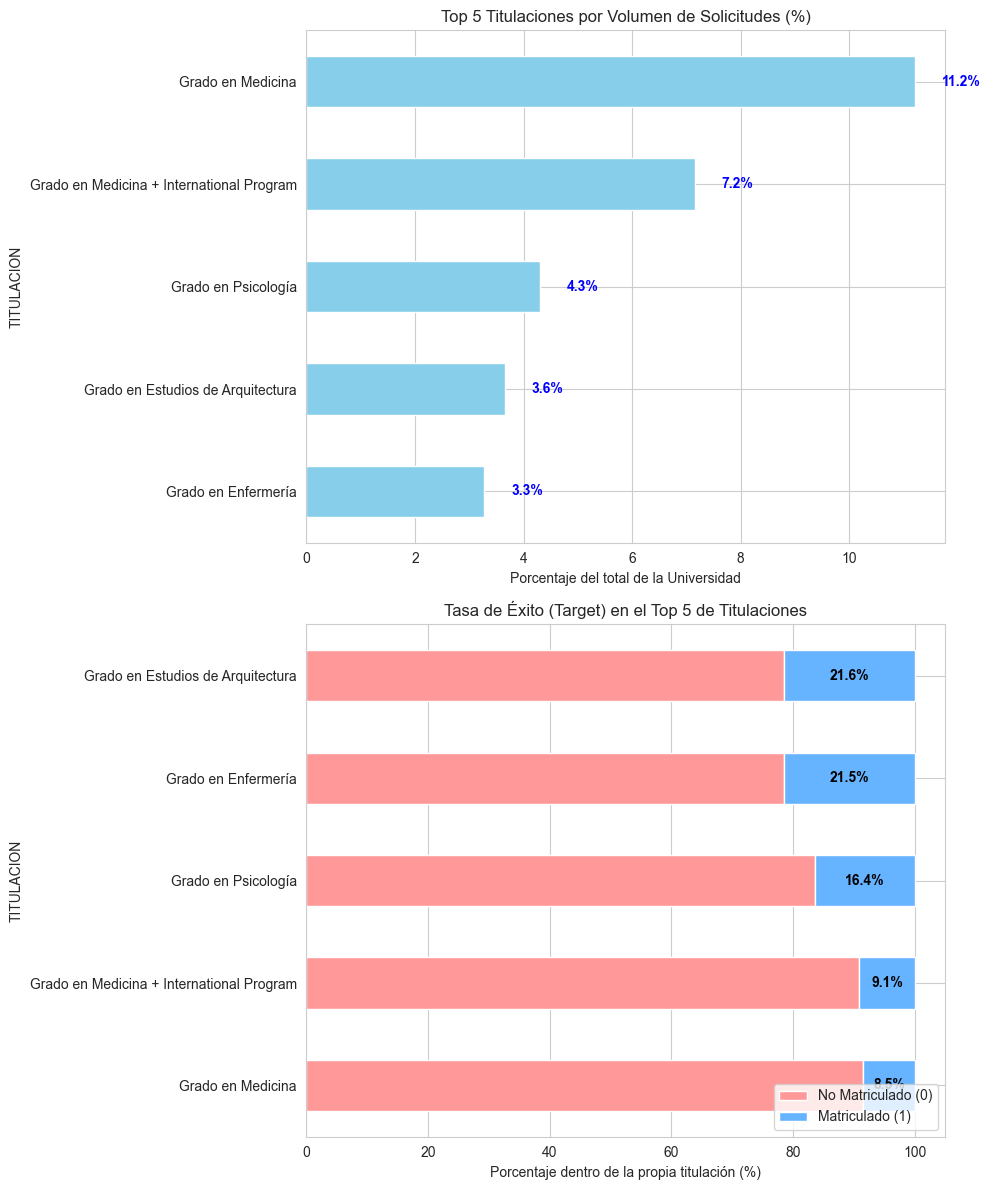

RESUMEN DE CONVERSIÓN:
TITULACION
Grado en Estudios de Arquitectura            21.58% de éxito
Grado en Enfermería                          21.52% de éxito
Grado en Psicología                          16.40% de éxito
Grado en Medicina + International Program     9.14% de éxito
Grado en Medicina                             8.51% de éxito
Name: 1, dtype: object


In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Cálculo de porcentajes generales
total_ops = len(df_unido)
conteo_titulaciones = df_unido['TITULACION'].value_counts()
porcentajes = (conteo_titulaciones / total_ops) * 100

# 2. Seleccionar el Top 5
top5_titulos = porcentajes.head(5)

# 3. Preparar datos para el desglose por Target
# Creamos una tabla cruzada (conteo) y luego calculamos porcentajes por fila
df_top5_data = df_unido[df_unido['TITULACION'].isin(top5_titulos.index)]
ct = pd.crosstab(df_top5_data['TITULACION'], df_unido['target'], normalize='index') * 100
ct = ct.sort_values(by=1, ascending=True) # Ordenar para el gráfico de barras

# --- VISUALIZACIÓN ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# GRÁFICO 1: Volumen total (Top 5)
top5_titulos.sort_values().plot(kind='barh', color='skyblue', ax=ax1)
ax1.set_title('Top 5 Titulaciones por Volumen de Solicitudes (%)')
ax1.set_xlabel('Porcentaje del total de la Universidad')

# Añadir etiquetas de texto
for i, v in enumerate(top5_titulos.sort_values()):
    ax1.text(v + 0.5, i, f'{v:.1f}%', color='blue', va='center', fontweight='bold')

# GRÁFICO 2: Desglose por Target (Éxito en Matrícula)
ct.plot(kind='barh', stacked=True, color=['#ff9999','#66b3ff'], ax=ax2)
ax2.set_title('Tasa de Éxito (Target) en el Top 5 de Titulaciones')
ax2.set_xlabel('Porcentaje dentro de la propia titulación (%)')
ax2.legend(['No Matriculado (0)', 'Matriculado (1)'], loc='lower right')

# Añadir etiquetas de porcentaje de éxito (Target 1)
for i, (idx, row) in enumerate(ct.iterrows()):
    ax2.text(row[0] + (row[1]/2), i, f'{row[1]:.1f}%', 
             va='center', ha='center', color='black', fontweight='bold')

plt.tight_layout()
plt.show()

# --- TABLA DE RESULTADOS PARA MARIO ---
print("RESUMEN DE CONVERSIÓN:")
print(ct[1].sort_values(ascending=False).apply(lambda x: f"{x:.2f}% de éxito"))

C:\Temp\ipykernel_18104\3411762819.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Porcentaje', y='Titulación', data=df_top5, palette='viridis')


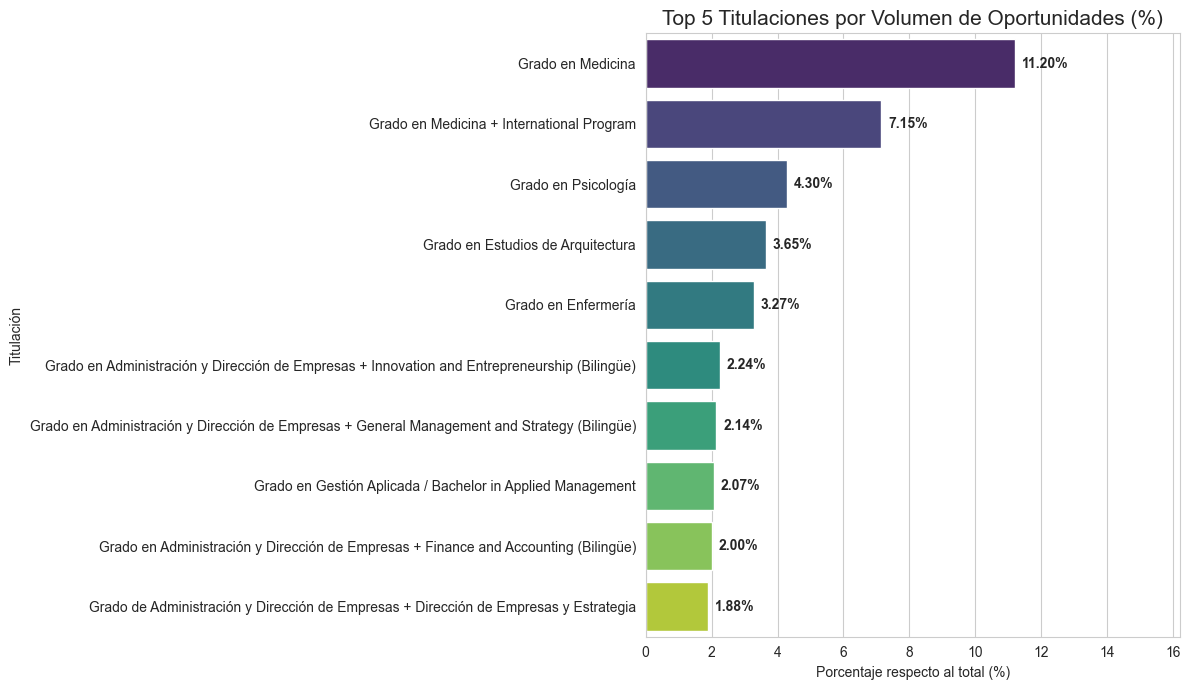

📋 DESGLOSE PORCENTUAL POR TITULACIÓN (TOP 10):
TITULACION
Grado en Medicina                                                                               11.20%
Grado en Medicina + International Program                                                        7.15%
Grado en Psicología                                                                              4.30%
Grado en Estudios de Arquitectura                                                                3.65%
Grado en Enfermería                                                                              3.27%
Grado en Administración y Dirección de Empresas + Innovation and Entrepreneurship (Bilingüe)     2.24%
Grado en Administración y Dirección de Empresas + General Management and Strategy (Bilingüe)     2.14%
Grado en Gestión Aplicada / Bachelor in Applied Management                                       2.07%
Grado en Administración y Dirección de Empresas + Finance and Accounting (Bilingüe)              2.00%
Grado de Admini

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calcular el volumen total de oportunidades
total_oportunidades = len(df_unido)

# 2. Calcular frecuencias y porcentajes
# Contamos cuántas veces aparece cada titulación
conteo_titulaciones = df_unido['TITULACION'].value_counts()
porcentajes_titulaciones = (conteo_titulaciones / total_oportunidades) * 100

# 3. Crear un DataFrame para facilitar la visualización de los 5 primeros
df_top5 = porcentajes_titulaciones.head(10).reset_index()
df_top5.columns = ['Titulación', 'Porcentaje']

# --- VISUALIZACIÓN ---
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# Creamos el gráfico de barras
ax = sns.barplot(x='Porcentaje', y='Titulación', data=df_top5, palette='viridis')

# Añadir las etiquetas de porcentaje al final de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}%', 
                (p.get_width(), p.get_y() + p.get_height() / 2),
                xytext=(5, 0), textcoords='offset points', 
                ha='left', va='center', fontweight='bold')

plt.title('Top 5 Titulaciones por Volumen de Oportunidades (%)', fontsize=15)
plt.xlabel('Porcentaje respecto al total (%)')
plt.ylabel('Titulación')
plt.xlim(0, df_top5['Porcentaje'].max() + 5) # Espacio para la etiqueta
plt.tight_layout()
plt.show()

# 4. Mostrar el listado completo en texto para el informe de Mario
print("📋 DESGLOSE PORCENTUAL POR TITULACIÓN (TOP 10):")
print(porcentajes_titulaciones.head(10).apply(lambda x: f"{x:.2f}%"))

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import sns

# 1. Identificar las 5 titulaciones con más volumen
top5_titulos = df_unido['TITULACION'].value_counts().head(5).index.tolist()

# 2. Filtrar el dataset para esas 5
df_top5_target = df_unido[df_unido['TITULACION'].isin(top5_titulos)].copy()

# 3. Calcular la tasa de conversión (media del target por título)
tabla_conversion = df_top5_target.groupby('TITULACION')['target'].value_counts(normalize=True).unstack() * 100
tabla_conversion = tabla_conversion.sort_values(by=1, ascending=False) # Ordenar por tasa de matrícula

# --- VISUALIZACIÓN ---
plt.figure(figsize=(12, 7))

# Gráfico de barras apiladas (Stacked Bar Chart)
ax = tabla_conversion.plot(kind='barh', stacked=True, color=['#e74c3c', '#2ecc71'], figsize=(10,6))

plt.title('Conversión de Solicitudes a Matrícula (Top 5 Titulaciones)', fontsize=14)
plt.xlabel('Porcentaje de Alumnos (%)')
plt.ylabel('Titulación')
plt.legend(['No Matriculado (0)', 'Matriculado (1)'], loc='upper right')

# Añadir etiquetas de texto con el % de éxito
for i, (idx, row) in enumerate(tabla_conversion.iterrows()):
    plt.text(row[1]/2 + row[0], i, f"{row[1]:.1f}%", 
             va='center', ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

# 4. Mostrar métricas de interés para Mario
print("📈 MÉTRICAS DE CONVERSIÓN POR TÍTULO:")
resumen = df_top5_target.groupby('TITULACION')['target'].agg(['count', 'sum', 'mean'])
resumen.columns = ['Total Solicitudes', 'Matrículas Reales', '% Conversión']
print(resumen.sort_values('% Conversión', ascending=False))

ModuleNotFoundError: No module named 'sns'

# 📝 Tratamiento tabla CASOS

---

**Objetivo del Notebook**  
Convertir eventos (visitas, llamadas) en contadores numéricos por alumno.

**Contexto del análisis**  
- Dataset de muestra proporcionado limpio
- Volumen reducido respecto al dataset real de producción  
- Enfoque en aprendizaje, validación del pipeline y comprensión del proceso

**Valor devuelto**  
- Contadores creados

---

In [51]:
# ===========================================
# 5. LEER LA COLUMNA CASOS DEL ARCHIVO LIMPIO
# ===========================================
df_casos = hojas_limpias["Casos"]

# Contar eventos por alumno
df_eventos = df_casos.groupby(['LK_Candidato__c', 'Subtype__c']).size().reset_index(name='COUNT')

# Pivot para columnas de eventos
df_eventos_pivot = df_eventos.pivot(index='LK_Candidato__c', columns='Subtype__c', values='COUNT').fillna(0)

print(df_eventos_pivot.head())


Subtype__c       0.0
LK_Candidato__c     
0.0               15
